first we will load the data

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("winequality-white.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


first display TSNE

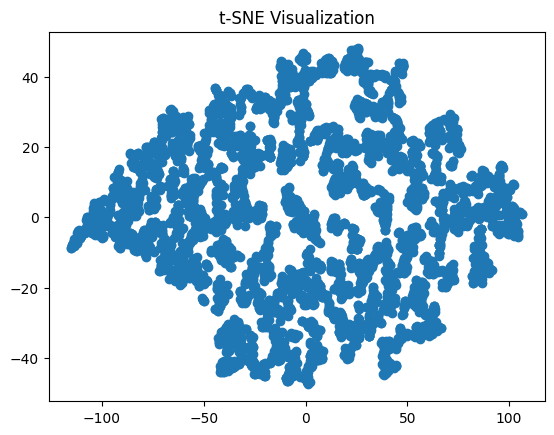

In [4]:
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(df)  # shape: (n_samples, 2)

# Optionally, if you have labels
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title("t-SNE Visualization")
plt.show()

now run kmeans with different clusters and print score

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

for i in range(2,20,1):
    kmeans = KMeans(n_clusters=i)
    kmeans_labels = kmeans.fit_predict(df)
    sil_score_kmeans = silhouette_score(df, kmeans_labels)
    print(f"iteration: {i}, score: {sil_score_kmeans}")



iteration: 2, score: 0.5059404063827766
iteration: 3, score: 0.41184882727890826
iteration: 4, score: 0.37412291496382855
iteration: 5, score: 0.3428684202100559
iteration: 6, score: 0.3212003262179234
iteration: 7, score: 0.31356735098018756
iteration: 8, score: 0.2975397339876611
iteration: 9, score: 0.3013892272342804
iteration: 10, score: 0.3048706280247954
iteration: 11, score: 0.2916635193962414
iteration: 12, score: 0.29265050867553316
iteration: 13, score: 0.28431218926000756
iteration: 14, score: 0.29594704122721815
iteration: 15, score: 0.2852605043116093
iteration: 16, score: 0.2905293074040999
iteration: 17, score: 0.2784703099322701
iteration: 18, score: 0.27620349020524393
iteration: 19, score: 0.27516422529222107


and now do the same for DBSCAN

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# X_tsne_scaled = X_tsne #StandardScaler().fit_transform(X_tsne)
dbscan = DBSCAN(eps=0.6, min_samples=3, n_jobs=-1).fit(df)
labels = dbscan.fit_predict(df)

if len(set(labels)) > 1:
    score = silhouette_score(df, labels)
    print("Silhouette Score:", score)
    print(f"number of labels: {len(labels)}")
else:
    print("DBSCAN found no clusters")

Silhouette Score: -0.700113506965445
number of labels: 4898
